<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-I/blob/main/Juego_ElevenSeven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicios de aplicacion

In [157]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

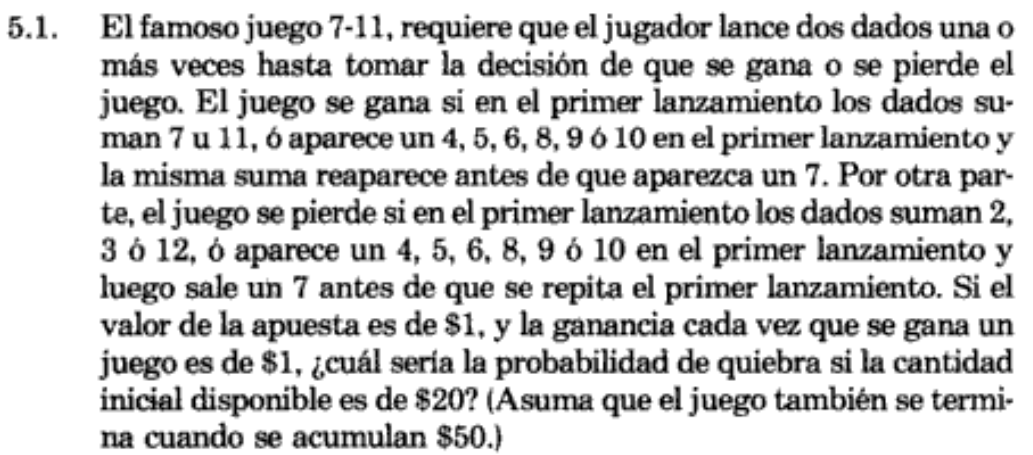

###Caso punto (3).
Cuando no se optiene ninguna de las sumas ganadoras (1) o perdedoras(2), se optine el dado punto, en esta posicion debes de tirar los dados hasta que te salga la misma suma o un 7, en el primer caso ganas el dinero en el segundo caso pierdes el dinero

In [146]:
def lanzamiento_dados():
#Evento 1:ganancia, 2:perdiad, 3:punto
  suma_dado={1:[7,11],2:[2,3,12],3:[4,5,6,8,9,10]}  #Eventos

  dado1= rd.randint(1, 6) #Tiramos dados
  dado2= rd.randint(1, 6)

  d12=dado1+dado2 #sumamos los dados
  estado=False
  i=1
  while estado==False:
    if i in suma_dado and d12 in suma_dado[i]: #Recorremos el diccionario para saber que evento sucedio
      etados=True
      return i,d12    #Regresamos el evento y la suma
    else:
      i+=1

In [147]:
def punto(dado): #Simulamos el evento punto
  estado=True
  g=0 #ganancia
  p=0 #perdida
  while estado==True: #aqui lanzaremos los dados hasta que uno de los escenarios suceda
    _,punto=lanzamiento_dados() #lanzamos los dados

    if punto==dado: #cuando el punto es igual al dado ganamos
      g=1
      turno=False   #esto nos ayudara en la siguiente funcion para seguir tirando

      estado=False
      return g,p,turno

    elif punto==7: #cuando el punto es un 7 perdemos
      p=1
      estado=False
      turno=False
      return g,p,turno

In [148]:
def es_unjugador():
  ganancia=0
  perdida=0
  # False:Pierde turno
  turno=True
  while turno==True:
    i,dados = lanzamiento_dados() #tiramos los dados

    if i==1:         #Ganamos $1
      ganancia=1
      turno=False
      return ganancia,perdida
    elif i==2:       #Perdemos $1
      perdida= 1
      turno=False
      return ganancia,perdida
    elif i==3:       #Punto
      ganancia,perdida,turno= punto(dados) #simulamos el evento punto
      return ganancia,perdida


Se menciona en el ejercicio que inicialmente tenemos $ \$20$ para jugar y que podemos ganar hasta $\$50$, osea que en total podemos generar una cantidad maxima de $\$70$

In [149]:
def eleven_seven():
  #seguimos los resultados del jugador 1

  #Iniciamos las ganancias y perdidas de cada jugador en 0
  j1_ganancia=0
  j1_perdida=0

  j2_ganancia=0
  j2_perdida=0

  #asignamos aleatoriamente quien empieza el juego
  start=rd.randint(1, 2)

  ganancia_neta=20 #inicialmente tenemos $20 para jugar
  while True:

    if start==1: #con uno empieza el jugador 1
      turno1=True
      while turno1==True:
        j1_ganancia,j1_perdida=es_unjugador() #tiramos los dados
        ganancia_neta=ganancia_neta+j1_ganancia #sumamos lo que se gano si es el caso
        ganancia_neta=ganancia_neta-j1_perdida #restamos lo que se perdio si es el caso

        if ganancia_neta<=0: #evaluamos si se cumple cualquiera de los dos casos
          return 0            #0 es para el caso de quedarnos sin dinero.
          break
        elif ganancia_neta>=70: #1 es para el caso de ganar $50
          return 1
          break

        elif j1_perdida==1: #Si hay una perdida significa que perdemos los dados y cambiamos a jugador 2
          turno1=False

      while turno1==False:
        j2_ganancia,j2_perdida=es_unjugador()
        ganancia_neta=ganancia_neta+j2_perdida #las perdidas para el jugador 2 son ganancias para el jugador 1 y viceversa
        ganancia_neta=ganancia_neta-j2_ganancia

        if ganancia_neta<=0:
          return 0
          break
        elif ganancia_neta>=70:
          return 1
          break

        if j2_perdida==1: #cambiamos a jugador 1
          turno1=True

    elif start==2: #con dos empieza el jugador 2
      turno2=True
      while turno2==True:
        j2_ganancia,j2_perdida=es_unjugador()
        ganancia_neta=ganancia_neta+j2_perdida
        ganancia_neta=ganancia_neta-j2_ganancia

        if ganancia_neta<=0:
          return 0
          break
        elif ganancia_neta>=70:
          return 1
          break

        elif j2_perdida==1:
          turno2=False        #cambiamos a jugador 1

      while turno2==False:
        j1_ganancia,j1_perdida=es_unjugador()
        ganancia_neta=ganancia_neta+j2_perdida
        ganancia_neta=ganancia_neta-j2_ganancia

        if ganancia_neta<=0:
          return 0
          break
        elif ganancia_neta>=70:
          return 1
          break

        if j2_perdida==1:
          turno1=True        #cambiamos a jugador 2


In [150]:
def estimacion(n):
  l=[]
  exitos=0
  for i in range(n):
    experimento= eleven_seven()
    if experimento==0:  #solo nos interesan los eventos en los que nos quedamos sin dinero
      exitos+=1
    prob=exitos/(i+1)
    l.append(prob)
  return l

media=  0.3734635201445673
error=  0.033246633053056016


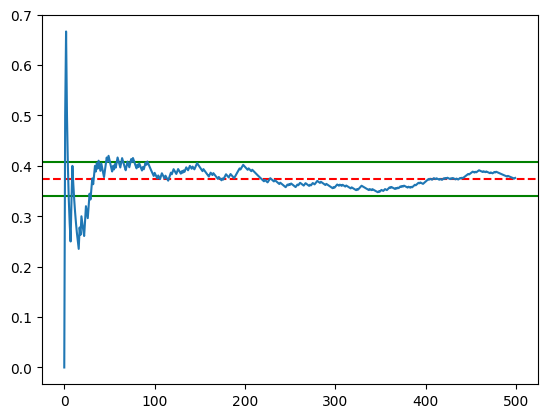

In [151]:
G=estimacion(500)

media=np.mean(G) #calculamos la media de las medias de la muestra
desv=np.std(G)   #Calculamos el error estandar de la media

print("media= ",media)
print("error= ",desv)

#Graficamos un intervalo de confianza de un error estandar
plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='g') #limite superior del intervalo
plt.axhline((-desv+media),color='g') #limite inferior del intervalo
plt.plot(G)
plt.show()


¿Cual valor de $N$ elegir?
Se ve que una muestra $N\approx 200$ da un resutado aceptable.

Ademas para modificar la funcion y convertirla en una corrida de la simulacion: $l\rightarrow l[-1]$ y fijamos N=200. Por ejemplo:

Ademas:
Estimamos un intervalo de confianza del 90% y dado que $n\geq 30$:
$$\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\leq x\leq \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

In [158]:
# Calculando el valor crítico de la distribución
p=0.90
error_estandar = desv / (N**0.5)
valor_critico = stats.norm.ppf((1 + p) / 2)

intervalo_inferior = media - valor_critico * error_estandar
intervalo_superior = media + valor_critico * error_estandar
#Intervalo de confianza
print(f"Intervalo de confianza del {p*100}%: ({intervalo_inferior}, {intervalo_superior})")

Intervalo de confianza del 90.0%: (0.3695966469638661, 0.37733039332526846)


In [152]:
N=200

In [153]:
def simulacion(M):
  r=[]
  for i in range(M):
    R=estimacion(N)
    r.append(R[-1])
  return r

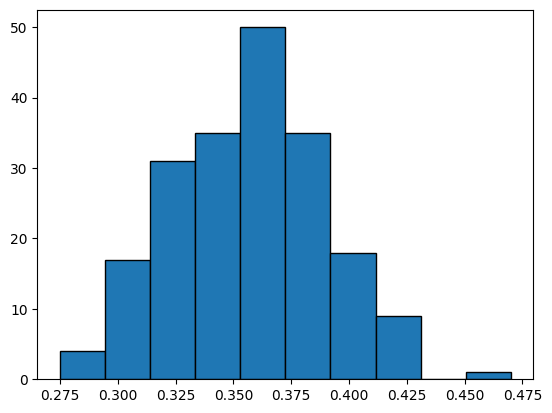

In [154]:
S=simulacion(200)
plt.hist(S, bins=10,edgecolor="black")
plt.show()

In [155]:
Juego_ES=np.mean(S)
print(Juego_ES)

0.35674999999999996


#Conclusion.
La probabilidad de quiebra es de $≈36\%$

Nota:El numero de simulaciones fue pequeño debido a la limitacion del equipo.

### Prueba K-S Para saber si sigue una distribucion normal

In [160]:
#kstest realiza la prueba K-S
estadistico,pvalue = stats.kstest(S, 'norm')

print("Estadístico de prueba:", estadistico)
print("Valor p: ", pvalue )
if pvalue < 0.05:
    print("La muestra no proviene de una distribución normal.")
else:
    print("La muestra proviene de una distribución normal.")

Estadístico de prueba: 0.6083418808463948
Valor p:  1.5298681075876422e-71
La muestra no proviene de una distribución normal.
